# Imports & Settings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

# Set up results directory
results_path = Path('results', 'trading_bot')
if not results_path.exists():
    results_path.mkdir(parents=True)

# Visualization

## SPDR S&P 500 ETF Trust

### Get Results

In [4]:
# Compile results

spy_file_list = [
             'results/trading_bot/SPY/SPY_Train_Model1_NoCost.csv',
             'results/trading_bot/SPY/SPY_Train_Model2.csv',
             'results/trading_bot/SPY/SPY_Train_Model3.csv',
             'results/trading_bot/SPY/SPY_Train_Model4.csv',
             'results/trading_bot/SPY/SPY_Train_Model5.csv',
             'results/trading_bot/SPY/SPY_Train_Model6.csv'
            ]

spy_test_file_list = [
                  'results/trading_bot/SPY/SPY_Test_Model1_NoCost.csv',
                  'results/trading_bot/SPY/SPY_Test_Model2.csv',
                  'results/trading_bot/SPY/SPY_Test_Model3.csv',
                  'results/trading_bot/SPY/SPY_Test_Model4.csv',
                  'results/trading_bot/SPY/SPY_Test_Model5.csv',
                  'results/trading_bot/SPY/SPY_Test_Model6.csv'
                 ]

spy_results_list = [pd.read_csv(file) for file in spy_file_list]
spy_test_results_list = [pd.read_csv(file) for file in spy_test_file_list]

spy_local_files = [file.split('/')[-1] for file in spy_file_list]
spy_test_local_files = [file.split('/')[-1] for file in spy_test_file_list]

spy_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Test Market']

### Plot Results

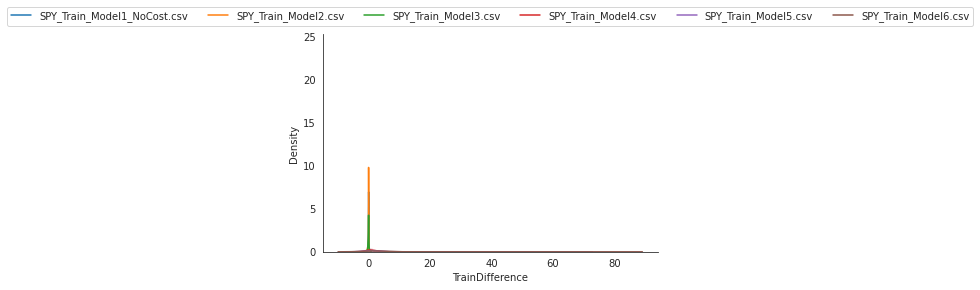

In [5]:
# Plot density histogram
with sns.axes_style('white'):
    for results in spy_results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(spy_local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(spy_file_list))

#### Training Data

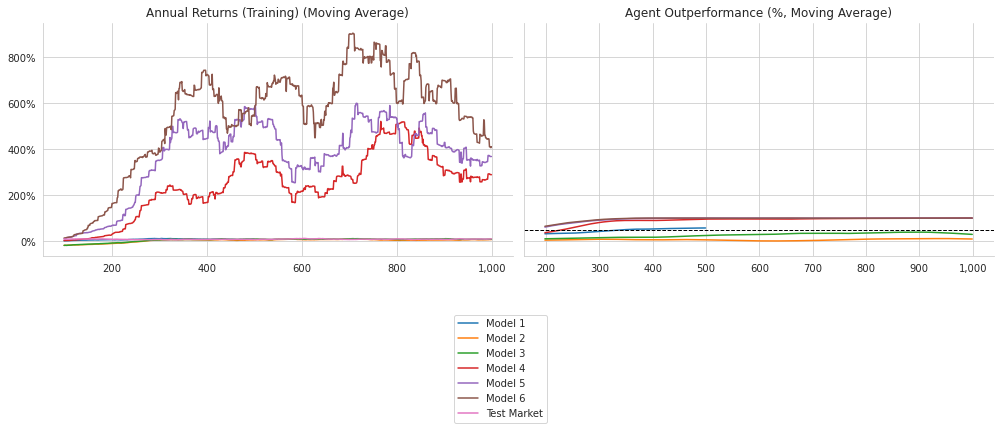

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(spy_results_list)):
    results = spy_results_list[r]
    data = results['TrainAgent']
    
    if r == len(spy_results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Training) (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(spy_results_list)):
    results = spy_results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(100) # Note: Rolling 100 may not be the common rolling value
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')
    
#fig.legend(labels=spy_local_files + ['TrainMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=spy_labels, bbox_to_anchor=(0.5, -0.5), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)

#### Testing Data

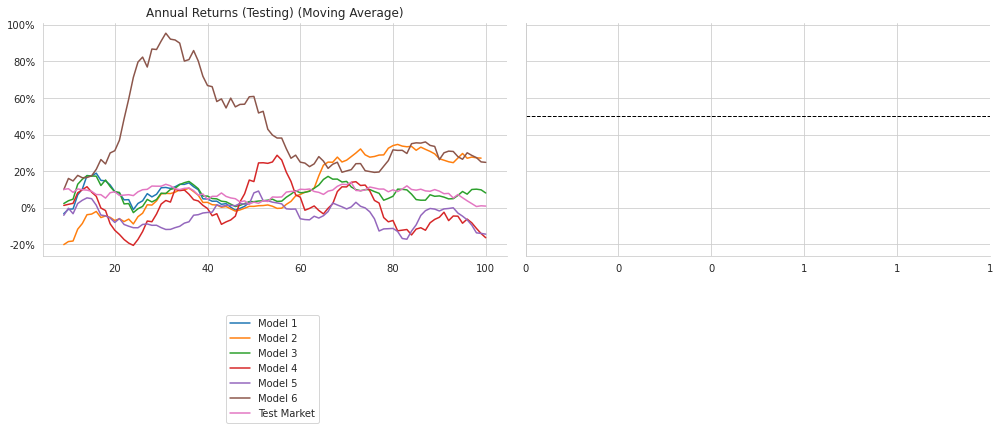

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(spy_test_results_list)):
    results = spy_test_results_list[r]
    data = results['TestAgent']
    
    if r == len(spy_test_results_list) - 1:
        data = results[['TestAgent','TestMarket']]
    
    df = (data
          .sub(1)
          .rolling(10)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Testing) (Moving Average)',
            legend='')
    sns.despine()
    fig.tight_layout()
    
#fig.legend(labels=spy_test_local_files + ['TestMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=spy_labels, bbox_to_anchor=(0.27, -0.5), loc='lower center')


for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

#fig.savefig(results_path / 'performance', dpi=300)




#### Action Frequency (Training Data)

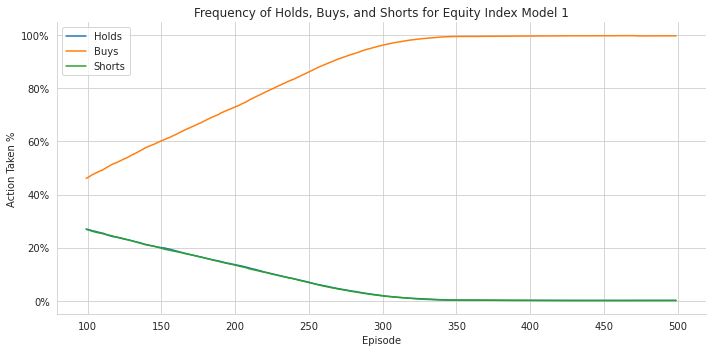

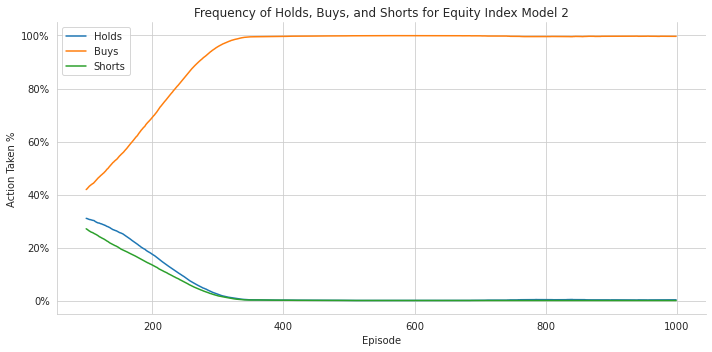

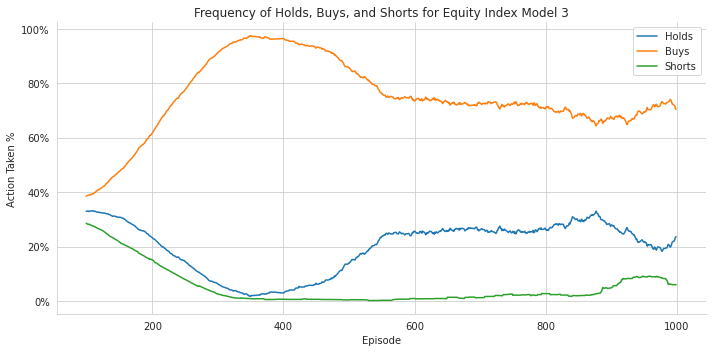

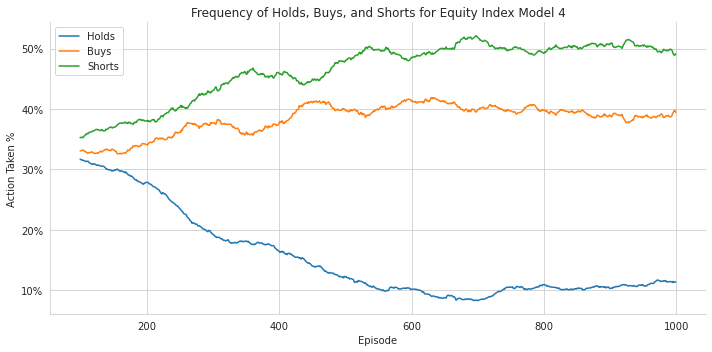

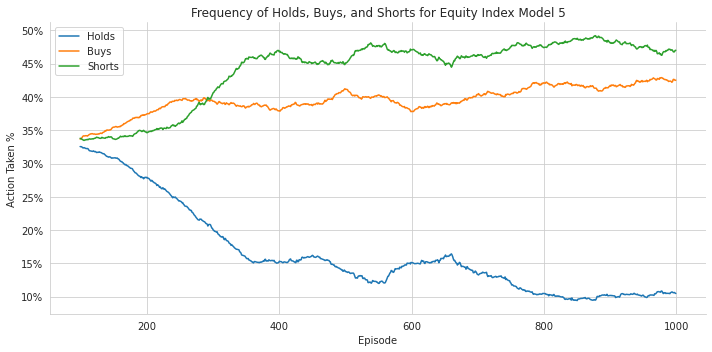

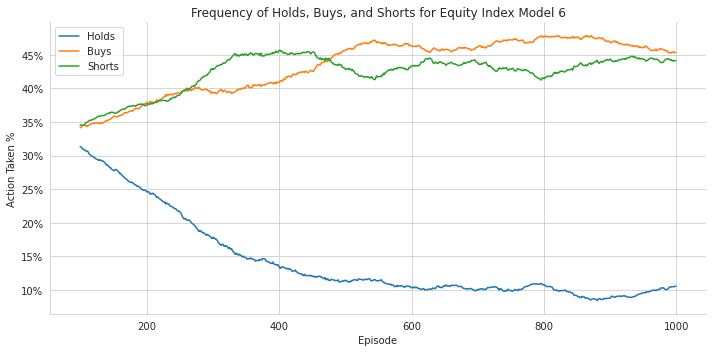

In [52]:
for r in range(0, len(spy_results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['Holds', 'Buys', 'Shorts']
    results = spy_results_list[r]
    
    # Rename columns if they don't conform
    results.rename(columns={"holds": "Holds", "buys": "Buys", "shorts": "Shorts"}, inplace=True)

    data = results[targets]
    total_actions = data['Holds'] + data['Buys'] + data['Shorts']
    data['Holds'] = data['Holds'] / total_actions
    data['Buys'] = data['Buys'] / total_actions
    data['Shorts'] = data['Shorts'] / total_actions
    
    df = (data
          .rolling(100)
          .mean())
    
    graph = df.plot(ax=axes,title='Frequency of Holds, Buys, and Shorts for Equity Index ' + spy_labels[r])
    graph.set_xlabel('Episode')
    graph.set_ylabel('Action Taken %')
    graph.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    sns.despine()
    fig.tight_layout()

#### Isolated Model Performance

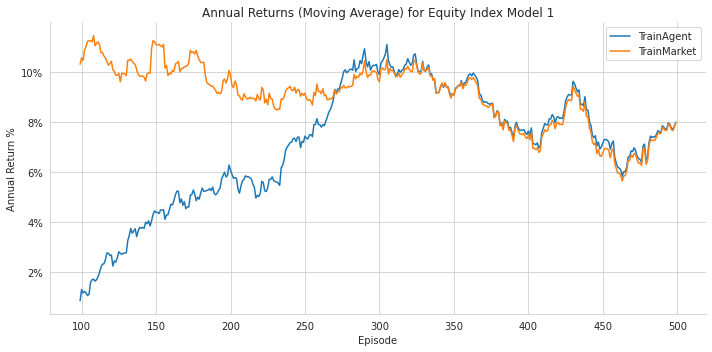

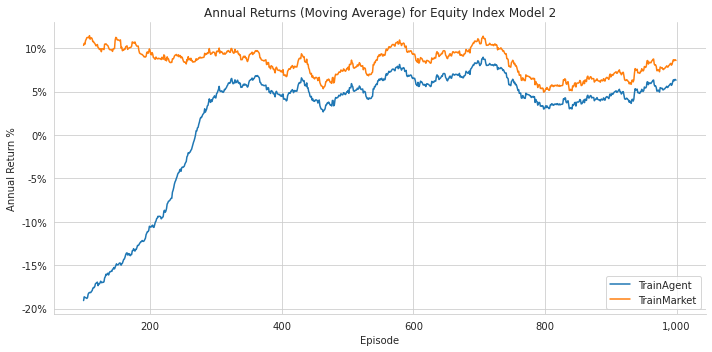

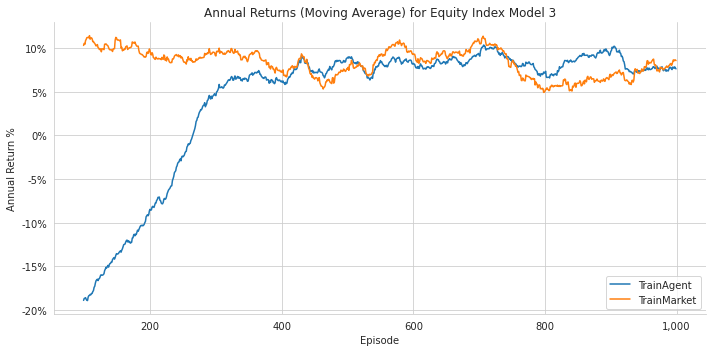

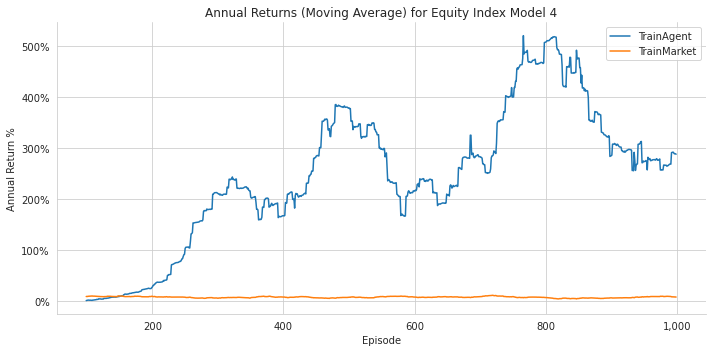

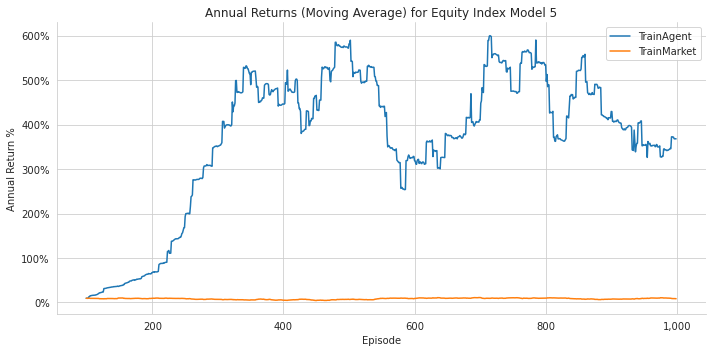

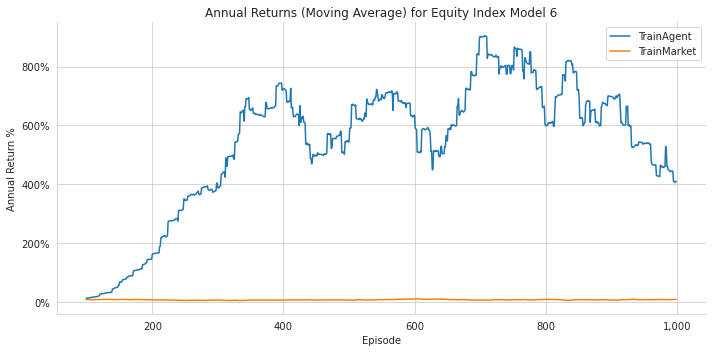

In [9]:
for r in range(0, len(spy_results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['TrainAgent', 'TrainMarket']
    results = spy_results_list[r]
    data = results[targets]

    df = (data
          .sub(1)
          .rolling(100)
          .mean())

    ax = df.plot(ax=axes,title='Annual Returns (Moving Average) for Equity Index ' + spy_labels[r])
    
    ax.set_xlabel('Episode')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    ax.set_ylabel('Annual Return %')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    sns.despine()
    fig.tight_layout()

## Foreign Exchange

### Get Results

In [10]:
fx_file_list = [
             'results/trading_bot/FX/FX_Train_Model1.csv',
             'results/trading_bot/FX/FX_Train_Model2.csv',
             'results/trading_bot/FX/FX_Train_Model3.csv',
             'results/trading_bot/FX/FX_Train_Model4.csv',
             'results/trading_bot/FX/FX_Train_Model5.csv',
             'results/trading_bot/FX/FX_Train_Model6.csv'
            ]

fx_test_file_list = [
                  'results/trading_bot/FX/FX_Test_Model1.csv',
                  'results/trading_bot/FX/FX_Test_Model2.csv',
                  'results/trading_bot/FX/FX_Test_Model3.csv',
                  'results/trading_bot/FX/FX_Test_Model4.csv',
                  'results/trading_bot/FX/FX_Test_Model5.csv',
                  'results/trading_bot/FX/FX_Test_Model6.csv'
                 ]

fx_results_list = [pd.read_csv(file) for file in fx_file_list]
fx_test_results_list = [pd.read_csv(file) for file in fx_test_file_list]

fx_local_files = [file.split('/')[-1] for file in fx_file_list]
fx_test_local_files = [file.split('/')[-1] for file in fx_test_file_list]

fx_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Test Market']

### Plot Results

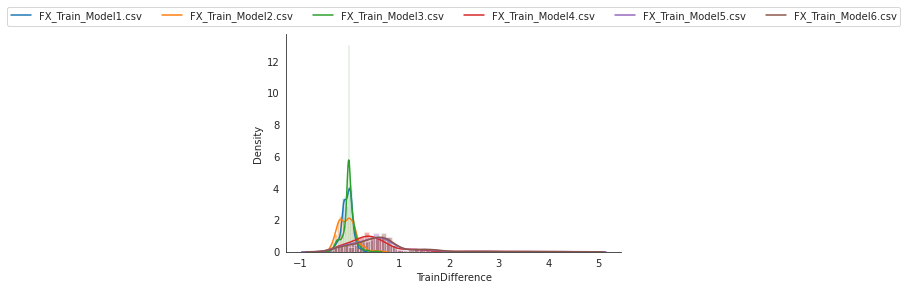

In [11]:
# Plot density histogram
with sns.axes_style('white'):
    for results in fx_results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(fx_local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(fx_file_list))

#### Training Data

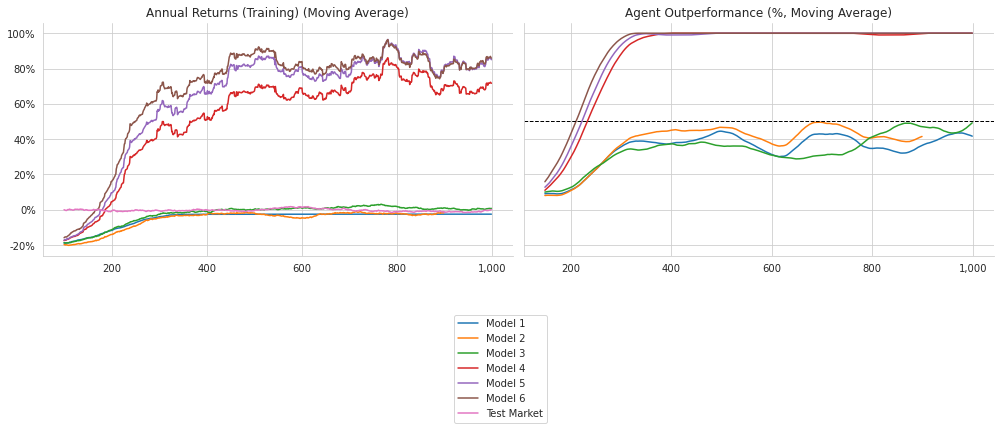

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(fx_results_list)):
    results = fx_results_list[r]
    data = results['TrainAgent']
    
    if r == len(fx_results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Training) (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(fx_results_list)):
    results = fx_results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(50)
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')
    
#fig.legend(labels=fx_local_files + ['TrainMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=fx_labels, bbox_to_anchor=(0.5, -0.5), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)

#### Testing Data

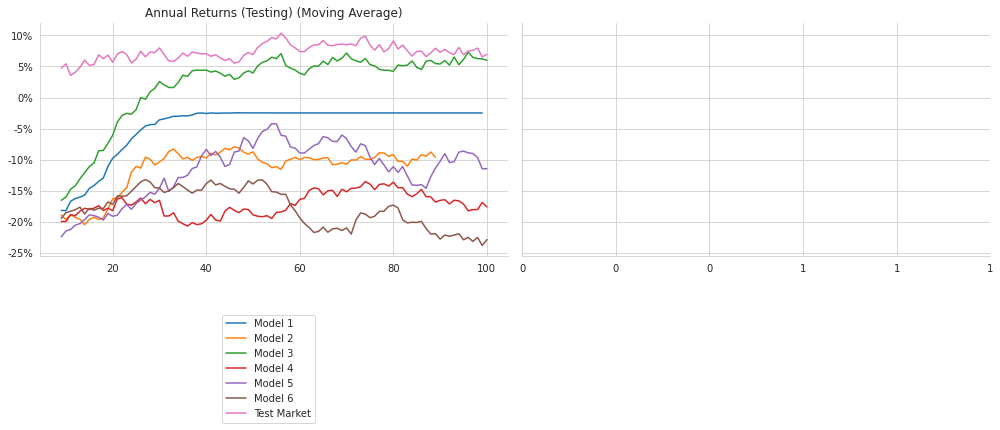

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(fx_test_results_list)):
    results = fx_test_results_list[r]
    data = results['TestAgent']
    
    if r == len(fx_test_results_list) - 1:
        data = results[['TestAgent','TestMarket']]
    
    df = (data
          .sub(1)
          .rolling(10)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Testing) (Moving Average)',
            legend='')
    
#fig.legend(labels=fx_test_local_files + ['TestMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=fx_labels, bbox_to_anchor=(0.27, -0.5), loc='lower center')


for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)




#### Action Frequency (Training Data)

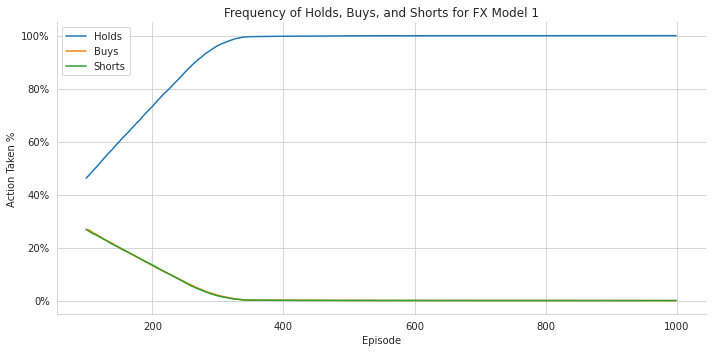

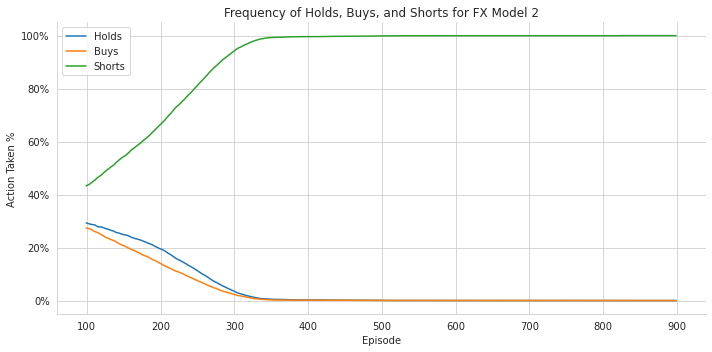

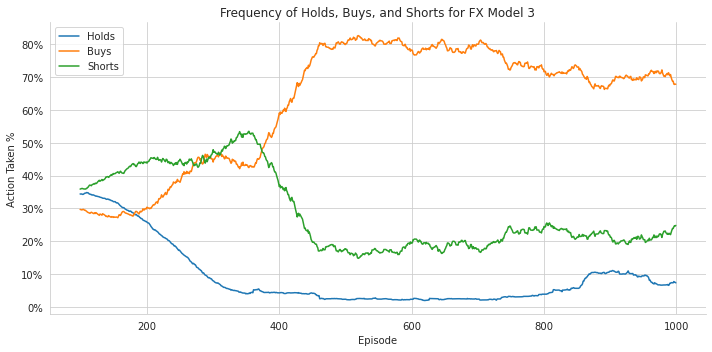

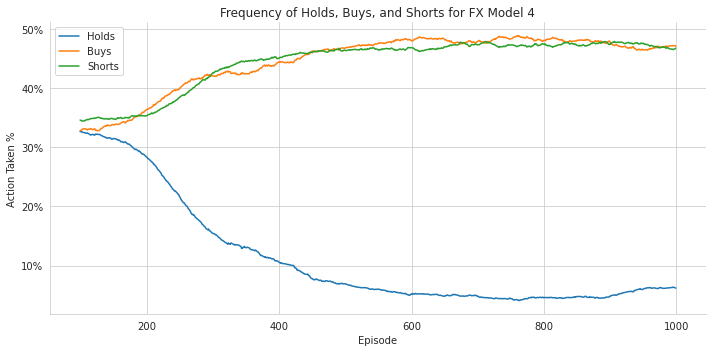

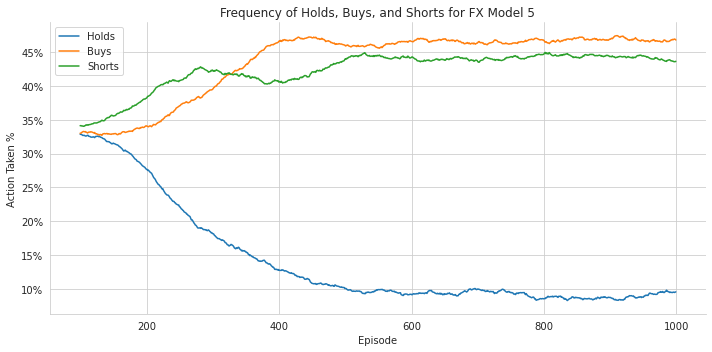

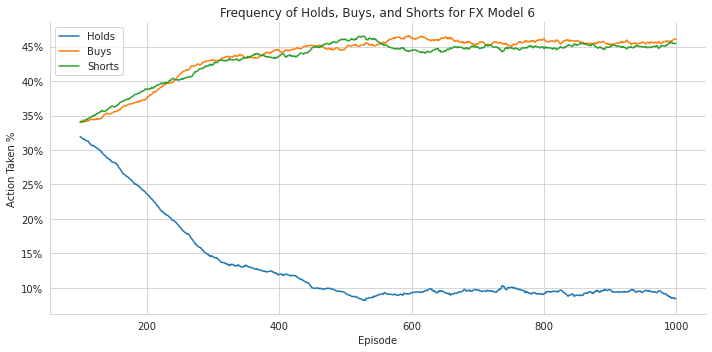

In [55]:
for r in range(0, len(fx_results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['Holds', 'Buys', 'Shorts']
    results = fx_results_list[r]
    
    # Rename columns if they don't conform
    results.rename(columns={"holds": "Holds", "buys": "Buys", "shorts": "Shorts"}, inplace=True)

    data = results[targets]
    total_actions = data['Holds'] + data['Buys'] + data['Shorts']
    data['Holds'] = data['Holds'] / total_actions
    data['Buys'] = data['Buys'] / total_actions
    data['Shorts'] = data['Shorts'] / total_actions
    
    df = (data
          .rolling(100)
          .mean())
    
    graph = df.plot(ax=axes,title='Frequency of Holds, Buys, and Shorts for FX ' + fx_labels[r])
    graph.set_xlabel('Episode')
    graph.set_ylabel('Action Taken %')
    graph.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    sns.despine()
    fig.tight_layout()

## SPDR S&P 500 ETF Trust (Intraday Data)

### Get Results

In [5]:
# Compile results

id_file_list = [
             'results/trading_bot/ID/ID_Train_Model1.csv',
             'results/trading_bot/ID/ID_Train_Model2.csv',
             'results/trading_bot/ID/ID_Train_Model3.csv',
             'results/trading_bot/ID/ID_Train_Model4.csv',
             'results/trading_bot/ID/ID_Train_Model5.csv',
             'results/trading_bot/ID/ID_Train_Model6.csv'
            ]

id_test_file_list = [
                  'results/trading_bot/ID/ID_Test_Model1.csv',
                  'results/trading_bot/ID/ID_Test_Model2.csv',
                  'results/trading_bot/ID/ID_Test_Model3.csv',
                  'results/trading_bot/ID/ID_Test_Model4.csv',
                  'results/trading_bot/ID/ID_Test_Model5.csv',
                  'results/trading_bot/ID/ID_Test_Model6.csv'
                 ]

id_results_list = [pd.read_csv(file) for file in id_file_list]
id_test_results_list = [pd.read_csv(file) for file in id_test_file_list]

id_local_files = [file.split('/')[-1] for file in id_file_list]
id_test_local_files = [file.split('/')[-1] for file in id_test_file_list]

id_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Test Market']

### Plot Results

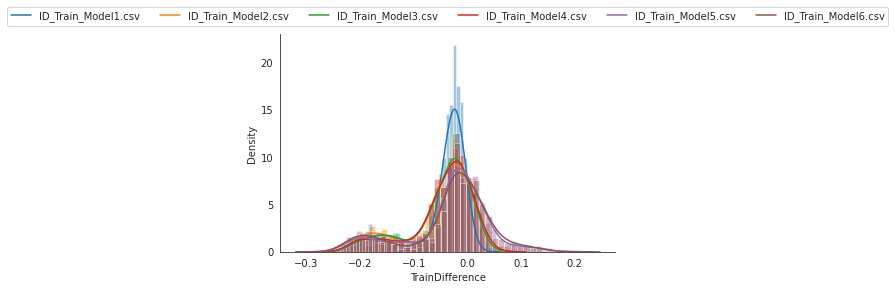

In [6]:
# Plot density histogram
with sns.axes_style('white'):
    for results in id_results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(id_local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(id_file_list))

#### Training Data

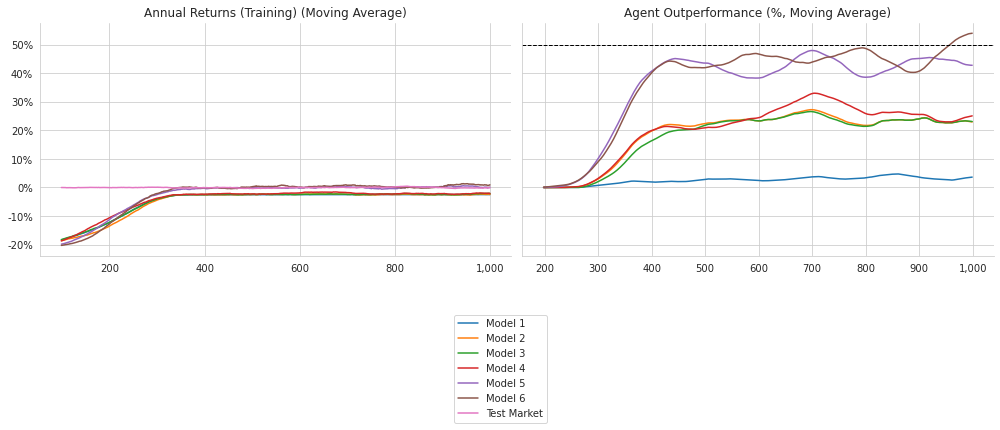

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(id_results_list)):
    results = id_results_list[r]
    data = results['TrainAgent']
    
    if r == len(id_results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Training) (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(id_results_list)):
    results = id_results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(100) # Note: Rolling 100 may not be the common rolling value
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')
    
#fig.legend(labels=id_local_files + ['TrainMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=id_labels, bbox_to_anchor=(0.5, -0.5), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)

#### Testing Data

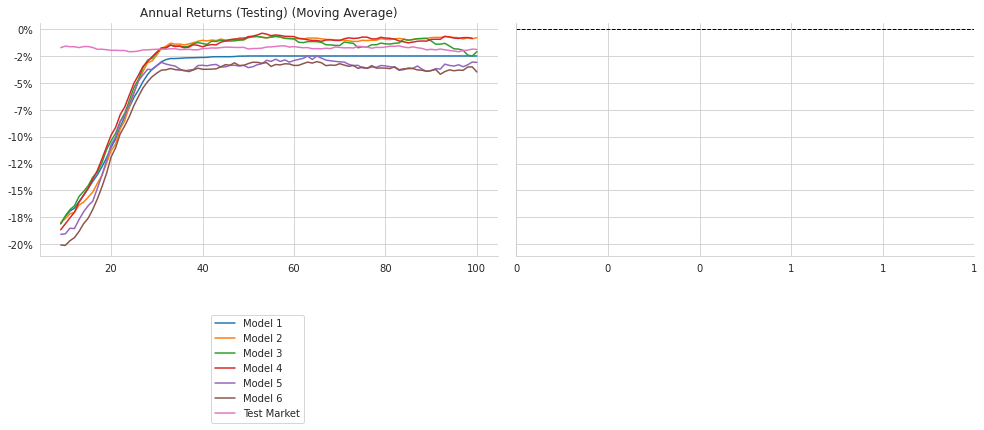

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(id_test_results_list)):
    results = id_test_results_list[r]
    data = results['TestAgent']
    
    if r == len(id_test_results_list) - 1:
        data = results[['TestAgent','TestMarket']]
    
    df = (data
          .sub(1)
          .rolling(10)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Testing) (Moving Average)',
            legend='')
    sns.despine()
    fig.tight_layout()
    
#fig.legend(labels=id_test_local_files + ['TestMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=id_labels, bbox_to_anchor=(0.27, -0.5), loc='lower center')


for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.0, ls='--', c='k', lw=1)

#fig.savefig(results_path / 'performance', dpi=300)




#### Action Frequency (Training Data)

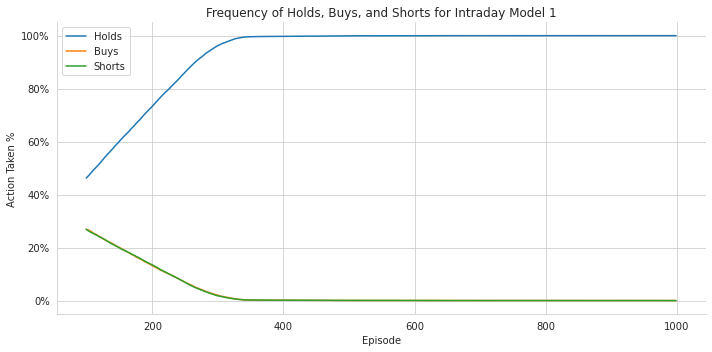

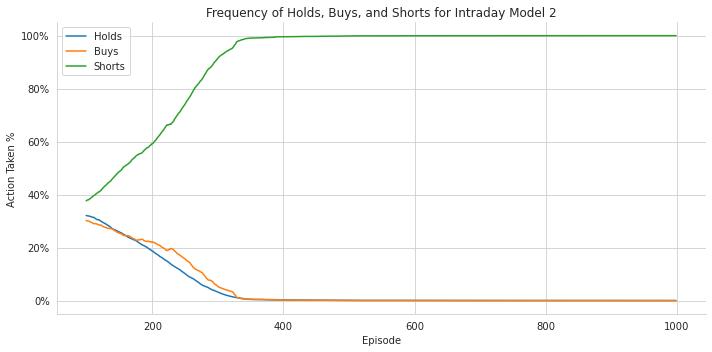

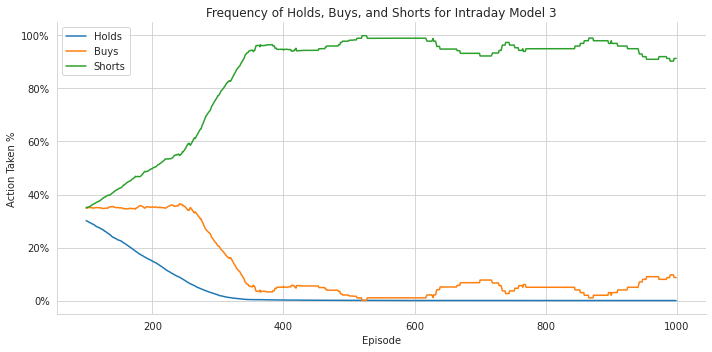

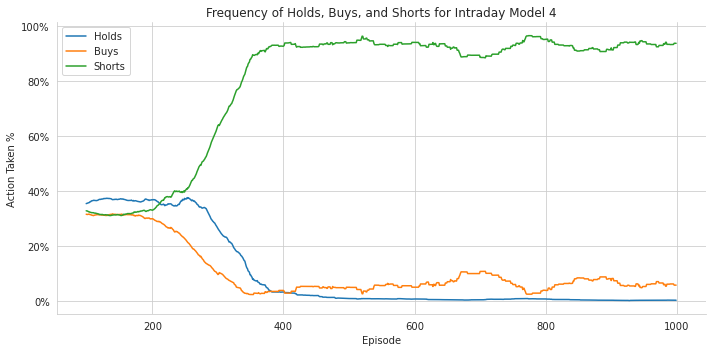

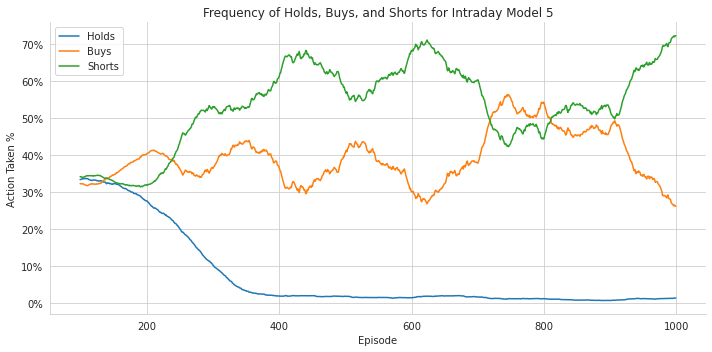

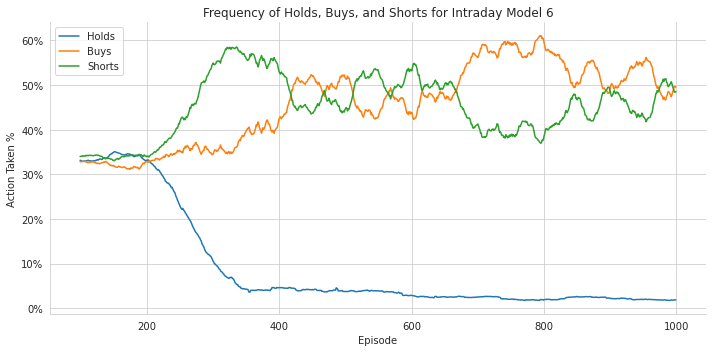

In [12]:
for r in range(0, len(id_results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['Holds', 'Buys', 'Shorts']
    results = id_results_list[r]
    
    # Rename columns if they don't conform
    results.rename(columns={"holds": "Holds", "buys": "Buys", "shorts": "Shorts"}, inplace=True)

    # Calculate action frequencies as a percentage of all actions
    data = results[targets]
    total_actions = data['Holds'] + data['Buys'] + data['Shorts']
    data['Holds'] = data['Holds'] / total_actions
    data['Buys'] = data['Buys'] / total_actions
    data['Shorts'] = data['Shorts'] / total_actions
    
    df = (data
          .rolling(100)
          .mean())
    
    graph = df.plot(ax=axes,title='Frequency of Holds, Buys, and Shorts for Intraday ' + id_labels[r])
    graph.set_xlabel('Episode')
    graph.set_ylabel('Action Taken %')
    graph.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    sns.despine()
    fig.tight_layout()

#### Isolated Model Performance

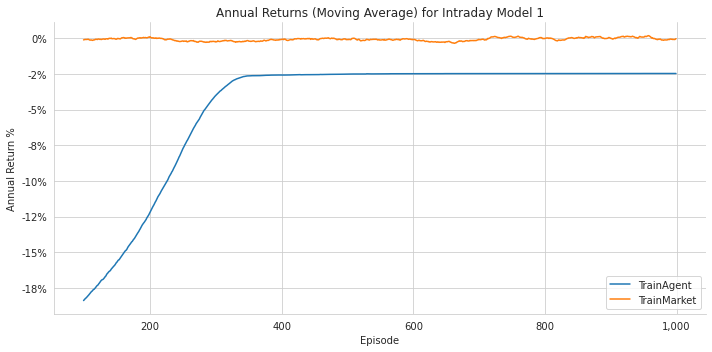

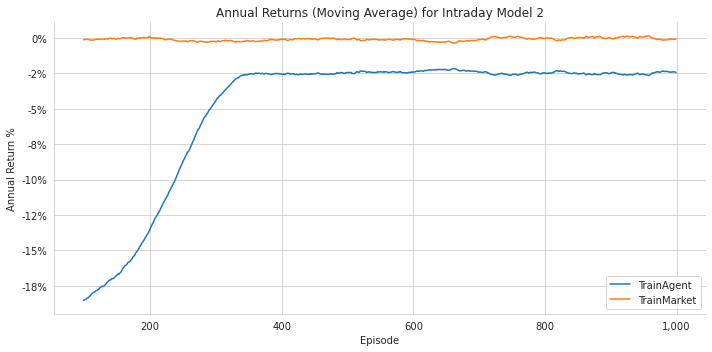

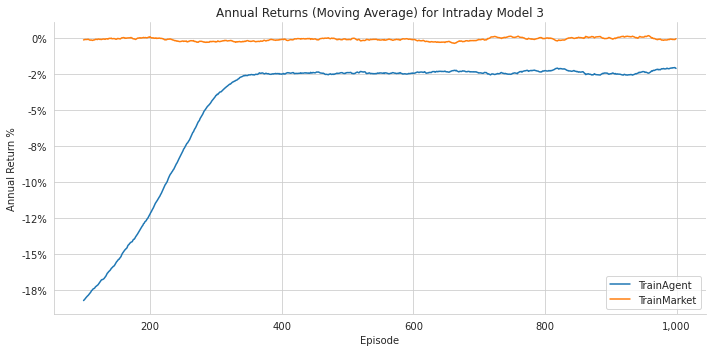

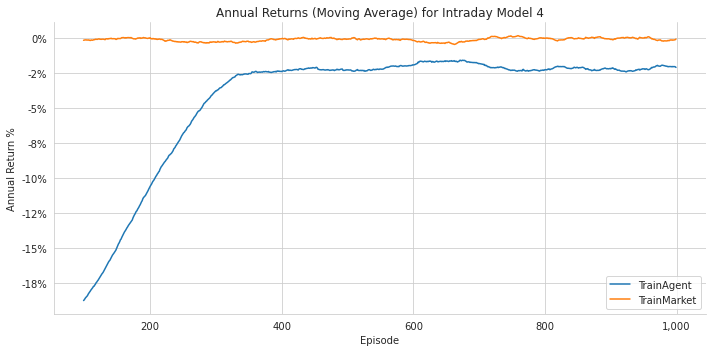

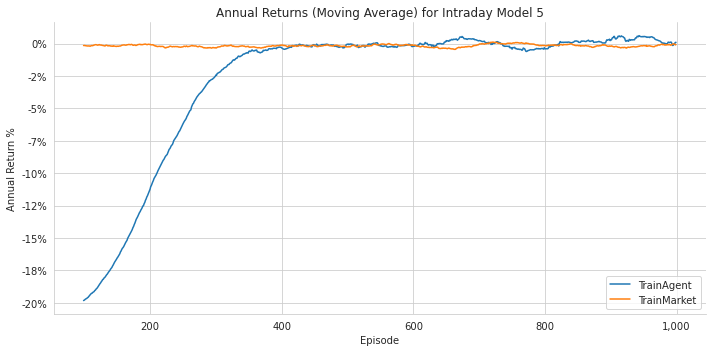

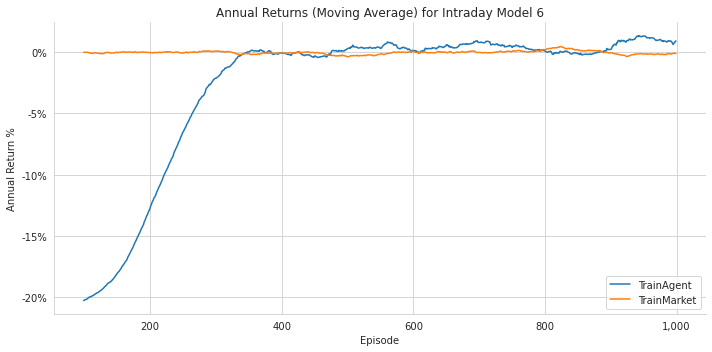

In [13]:
for r in range(0, len(id_results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['TrainAgent', 'TrainMarket']
    results = id_results_list[r]
    data = results[targets]

    df = (data
          .sub(1)
          .rolling(100)
          .mean())

    ax = df.plot(ax=axes,title='Annual Returns (Moving Average) for Intraday ' + id_labels[r])
    
    ax.set_xlabel('Episode')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    ax.set_ylabel('Annual Return %')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    sns.despine()
    fig.tight_layout()